# Numerical Path Integral for Quantum Harmonic Oscillator

### Potentials

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import vegas

%matplotlib inline

#Harmonic
def v_sho(x):
    
    return (x**2)/2

#Anharmonic
def v_aho(x):
    
    return (x ** 4)/2


### Correlator

In [200]:
def integrand_fixed_endpoints(x, x0, V, m, a, N):
    
    #End Points
    res =  (m/(2*a)) * (x[0]-x0)**2 + a * V(x0) 
    res += (m/(2*a)) * (x0-x[-1])**2 + a * V(x[-1])
    #Path Points
    res += (m/(2*a)) * np.sum((x[1:] - x[:-1])**2) + a * np.sum(V(x[:-1]))
    #Normalisation
    A = (m/(2 * np.pi * a))** (N/2)
    
    return A * np.exp(-1.0 * res)


def vegas_int_fixed(x0, V, m, a, N):
    
    lims = [[-5,5]]*(N-1)
    integ = vegas.Integrator(lims)
    func = partial(integrand_fixed_endpoints, x0 = x0, V=V, m = m, a = a, N = N)
    res = integ(func, nitn = 11, neval = 100000)
    
    return res.mean

def corr_analytic(x, a, N):
    
    x = np.array(x)
    
    return (np.exp(-1.0 * x**2)/np.sqrt(np.pi)) * np.exp(-1.0 * 1/2 * a * N)
    

### Energy and Wavefunction Squared

In [201]:
def integrand_full(x, V, m, a, N):
    
    #End Point
    res =  (m/(2*a)) * (x[0]-x[-1])**2 + a * V(x[-1]) 
    #Path Points
    res += (m/(2*a)) * np.sum((x[1:] - x[:-1])**2) + a * np.sum(V(x[:-1]))
    #Normalisation
    A = (m/(2 * np.pi * a))** (N/2)
    
    return A * np.exp(-1.0 * res)

def vegas_int_full(V, m, a, N):
    
    lims = [[-5,5]]*(N)
    integ = vegas.Integrator(lims)
    func = partial(integrand_full, V = V, m = m, a = a, N = N)
    res = integ(func, nitn = 15, neval = 100000).mean
    
    return res

### Analysis

In [202]:
def analysis(V, m, a, N, analytical = True):
    #Extract Ground State Energy E0 and Wave Function Squared psi2 and compare
    expTE = vegas_int_full(V=V, m=m, a=a, N=N)
    E0 = -1.0*np.log(expTE)/(a*N)
    
    #Analytical Solutions for Comparison
    x0_list=np.linspace(0, 2, 10)
    psi2_analytical = np.exp(-x0_list ** 2) / np.sqrt(np.pi)
    corr_analytical = analytic(x0_list, a, N)
    
    #Numerical Solutions
    corr_numerical = np.empty(x0_list.shape)
    for i, x0 in enumerate(x0_list):
        corr_numerical[i] = vegas_int_fixed(x0=x0_list[i], V=V, m=m, a=a, N=N)
    
    psi2_numerical = corr_numerical / expTE
    
    #Plotting
    fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 8), dpi=100, sharex=True)
    
    if analytical == True:
        ax1.plot(x0_list, corr_analytical, label = "Analytical Soln")
    ax1.scatter(x0_list, corr_numerical, label = "Numerical Soln")
    ax1.set_ylabel(r"$\langle x | e^{-HT} | x \rangle $")
    ax1.set_title("Propagtor from x0 to x0 as a Function of x0")
    ax1.set_xlim(0,2)
    ax1.set_ylim(0,0.1)
    ax1.legend()
    
    if analytical == True:
        ax2.plot(x0_list, psi2_analytical, label = "Analytical Soln")
    ax2.scatter(x0_list, psi2_numerical, label = "Numerical Soln")
    ax2.set_xlabel("x0")
    ax2.set_ylabel("$|\psi(x)|^2$")
    ax2.set_title("Ground State Wave Function Squared")
    ax2.set_xlim(0,2)
    ax2.set_ylim(0,1)
    ax2.legend()
    
    print("Ground State Energy (E0):  " + str(E0))
    plt.show()

### Harmonic Oscillator Results

Ground State Energy (E0):  0.489355030363


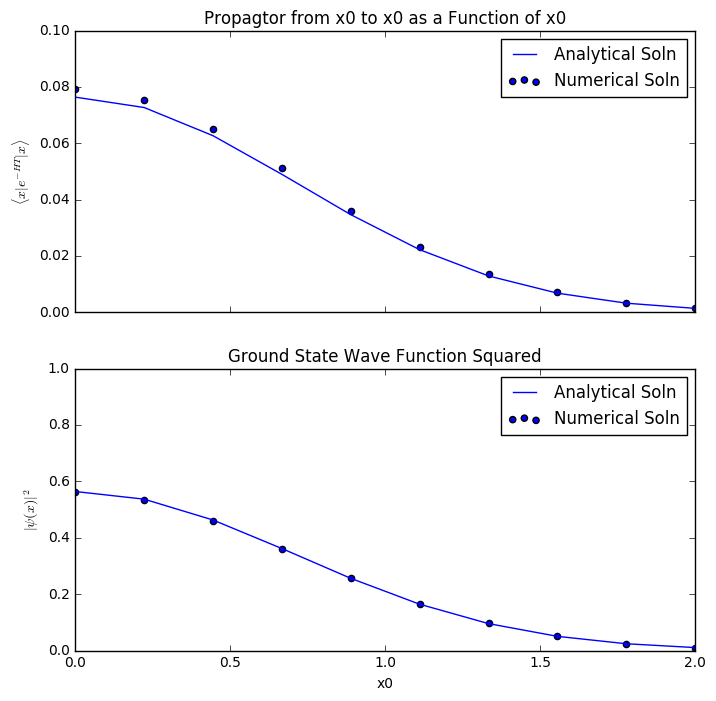

In [203]:
analysis(v_sho, 1, 0.5, 8)

### Anharmonic Oscillator Results

Ground State Energy (E0):  0.510652579658


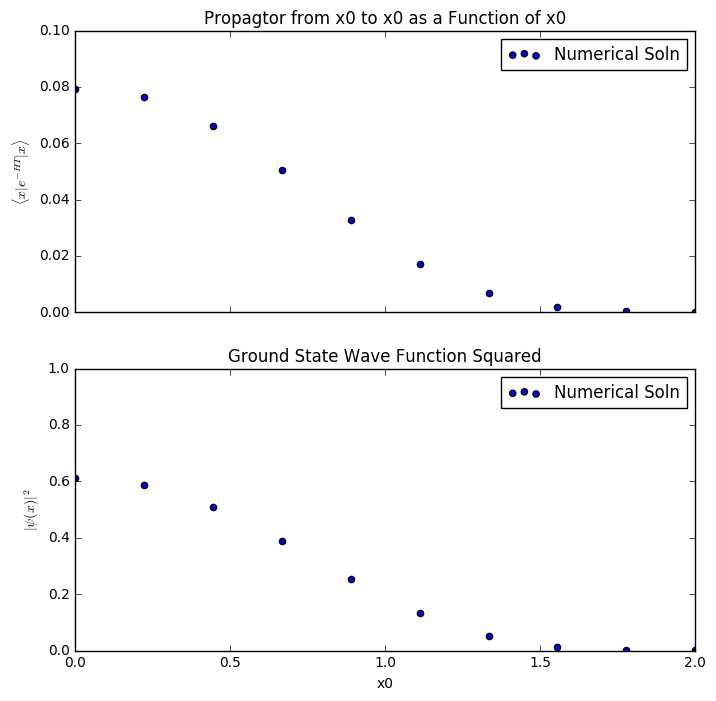

In [204]:
analysis(v_aho, 1, 0.5, 8, analytical = False)